<a href="https://colab.research.google.com/github/ElenaNtm/Energy-price-predictions/blob/main/Visualization_Trading_Data(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data

In [ ]:
path = "/content/drive/MyDrive/base_exchange_data_HENEX.csv"
#df = pd.read_csv(path, parse_dates=["Trade Day"])
df = pd.read_csv(path)

the two indexes will be Instrument and Trading Day

In [ ]:
df.head()

Unnamed: 0   Trade Day Instrument   Number of Orders  Max Price of Orders   \
0           0  2022-09-01   GREBM0922               NaN                   NaN   
1           1  2022-09-01   GREBM1022               2.0                 545.0   
2           2  2022-09-01   GREBM1122               2.0                 665.5   
3           3  2022-09-01    GREBQ422               6.0                 640.0   
4           4  2022-09-01     GREBY23              14.0                 549.0   

   Min Price of Orders   Average Price of Orders   Number of Quotes   \
0                   NaN                       NaN                NaN   
1                 542.0                543.500000                1.0   
2                 661.5                663.500000                1.0   
3                 632.0                636.166667                3.0   
4                 520.0                535.785714                7.0   

   Number of Trades  Average Price of Trades  Total Quantity of Trades   \
0               NaN                      NaN                        NaN   
1               NaN                      NaN                        NaN   
2               NaN                      NaN                        NaN   
3               NaN                      NaN                        NaN   
4               NaN                      NaN                        NaN   

   Start Prices   Fixing Prices   Open Interest   
0         605.13          605.13            14.0  
1         593.50          543.50             NaN  
2         713.50          663.50             NaN  
3         671.50          636.50             1.0  
4         577.50          522.50             NaN

In [ ]:
#df.iloc[42]

In [ ]:
df['Trading Day'] = pd.to_datetime(df['Trade Day'].str[:10], errors='coerce')

In [ ]:
# Convert the 'datetime' column to datetime format
#df['Trading Day'] = pd.to_datetime(df['Trading Day'])

# Find rows with NaT values and return their positions
#na_values_mask = df['Trading Day'].isna()
#rows_with_nat = df.loc[na_values_mask]

# Get the positions (indices) of rows with NaT values
#positions_with_nat = df.index[na_values_mask]

#print("Rows with NaT values:")
#print(rows_with_nat)

#print("\nPositions of rows with NaT values:")
#print(positions_with_nat)

In [ ]:
#df.iloc[428]

In [ ]:
df = df.drop(df.index[428])

In [ ]:
# Drop the original 'datetime_str' column if you no longer need it
df.drop(columns=['Trade Day'], inplace=True)

##Rename the columns so they don't have spaces

In [ ]:
df.columns

Index(['Instrument ', 'Number of Orders', 'Max Price of Orders ',
       'Min Price of Orders ', 'Average Price of Orders ', 'Number of Quotes ',
       'Number of Trades', 'Average Price of Trades (VWAP)',
       'Total Quantity of Trades ', 'Start Prices ', 'Fixing Prices ',
       'Open Interest ', 'Average Price of Trades', 'Trading Day'],
      dtype='object')

In [ ]:
df.rename(columns={'Instrument ': 'Instrument'}, inplace=True)

#Find Duplicate Indexes and Drop- NOT TO RUN

In [ ]:
bool_series = df.duplicated()

In [ ]:
z = [i for i, x in enumerate(bool_series) if x]
print(z)

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [ ]:
df.iloc[23:32]

Instrument   Number of Orders  Max Price of Orders   Min Price of Orders   \
23   GREBM0623               NaN                   NaN                   NaN   
24   GREBM0723               6.0                109.00                106.00   
25   GREBM0823               2.0                112.50                108.50   
26    GREBQ124               1.0                164.00                164.00   
27    GREBQ224               1.0                137.00                137.00   
28    GREBQ323               2.0                113.00                110.00   
29     GREBY24               4.0                152.00                146.00   
30   GREPM0723               2.0                110.83                106.33   
31    GREPQ323               2.0                117.10                112.60   

    Average Price of Orders   Number of Quotes   Number of Trades  \
23                       NaN                NaN               NaN   
24                    107.50                3.0               NaN   
25                    110.50                1.0               NaN   
26                    164.00                NaN               NaN   
27                    137.00                NaN               NaN   
28                    111.50                1.0               NaN   
29                    149.00                2.0               NaN   
30                    108.58                1.0               NaN   
31                    114.85                1.0               NaN   

    Average Price of Trades (VWAP)  Total Quantity of Trades   Start Prices   \
23                             NaN                        NaN          95.00   
24                             NaN                        NaN         112.63   
25                             NaN                        NaN         114.50   
26                             NaN                        NaN         178.50   
27                             NaN                        NaN         157.50   
28                             NaN                        NaN         116.50   
29                             NaN                        NaN         154.50   
30                             NaN                        NaN         112.62   
31                             NaN                        NaN         120.00   

    Fixing Prices   Open Interest   Average Price of Trades Unnamed: 2  \
23           95.00            21.0                      NaN        NaN   
24          107.50             9.0                      NaN        NaN   
25          110.50             4.0                      NaN        NaN   
26          178.50             NaN                      NaN        NaN   
27          157.50             NaN                      NaN        NaN   
28          111.50             5.0                      NaN        NaN   
29          148.50             NaN                      NaN        NaN   
30          108.58             NaN                      NaN        NaN   
31          114.85             1.0                      NaN        NaN   

   Trading Day  
23  2023-06-27  
24  2023-06-27  
25  2023-06-27  
26  2023-06-27  
27  2023-06-27  
28  2023-06-27  
29  2023-06-27  
30  2023-06-27  
31  2023-06-27

In [ ]:
#df.drop_duplicates()

#Missing Values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total   Percent
Unnamed: 2                        472  1.000000
Average Price of Trades (VWAP)    465  0.985169
Average Price of Trades           446  0.944915
Number of Trades                  439  0.930085
Total Quantity of Trades          439  0.930085
Open Interest                     258  0.546610
Number of Quotes                  138  0.292373
Number of Orders                   69  0.146186
Max Price of Orders                69  0.146186
Min Price of Orders                69  0.146186
Average Price of Orders            69  0.146186
Instrument                          0  0.000000
Start Prices                        0  0.000000
Fixing Prices                       0  0.000000
Trading Day                         0  0.000000

In [ ]:
df.drop(['Unnamed: 2'], axis=1, inplace = True)

In [ ]:
#Fill the rest with 0, we dont want to lose columns
df.fillna(0, inplace = True)

#Corelation Matrix

In [ ]:
# prints data that will be plotted columns shown here are selected by corr() since they are ideal for the plot
print(df.corr())

                                Number of Orders  Max Price of Orders   \
Number of Orders                        1.000000             -0.163576   
Max Price of Orders                    -0.163576              1.000000   
Min Price of Orders                    -0.234516              0.987442   
Average Price of Orders                -0.200591              0.998070   
Number of Quotes                        0.954690             -0.028477   
Number of Trades                        0.487917             -0.276140   
Average Price of Trades (VWAP)         -0.076822              0.976170   
Total Quantity of Trades                0.434307             -0.320578   
Start Prices                           -0.332578              0.914720   
Fixing Prices                          -0.304864              0.945492   
Open Interest                           0.134791             -0.313888   
Average Price of Trades                -0.048933              0.994540   

                                Min P

<ipython-input-14-8e153f886bf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-15-9cfabf83029c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


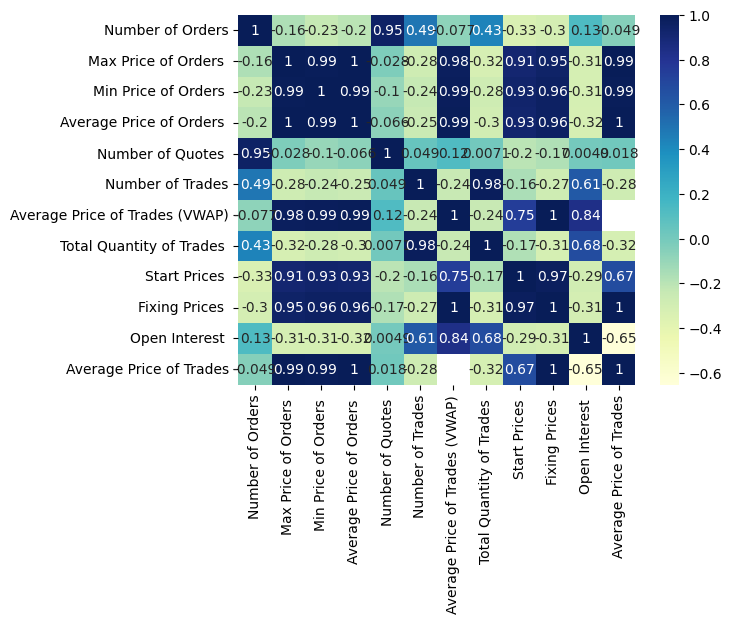

<Figure size 2500x2500 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.figure(figsize=(25,25))
plt.show()

#Group by Instrument to see how they behave

In [ ]:
#first find disticnt values of instrument
# Using value_counts() method
value_counts_result = df['Instrument '].value_counts()
print("Distinct Instruments")
print(value_counts_result)

Distinct Instruments
GREBM0623    47
GREBQ323     47
GREBY24      47
GREPQ323     47
GREPY24      47
GREBM0723    41
GREBQ124     36
GREBQ224     34
GREBM0523    25
GREPM0523    25
GREPM0623    22
GREBM0823    20
GREPM0723    20
GREBM0423     4
GREPM0423     4
GREBQ423      2
GREPM0823     1
GREPQ124      1
GREBM0923     1
GREPM0923     1
Name: Instrument , dtype: int64


##Group by instrument

In [ ]:
grouped_df = df.groupby('Instrument ')

# Print each group
#for group_name, group_data in grouped_df:
#    print(f"Group: {group_name}")
#    print(group_data)
#    print("\n")

#Visualise the data by group

In [ ]:
#df.info()

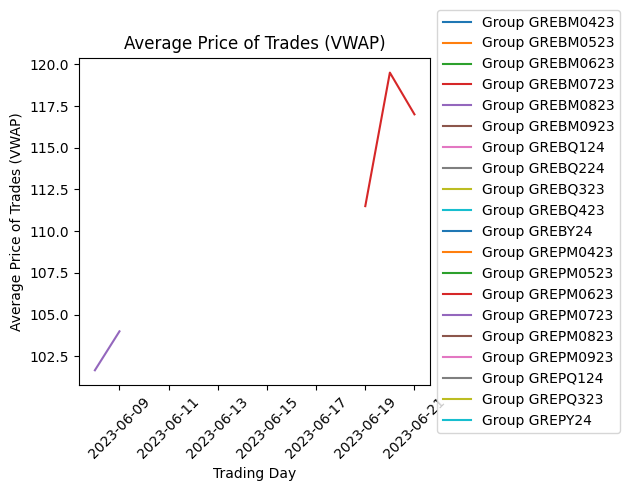

In [ ]:
# Plot the 'Average Price of Trades (VWAP)' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Average Price of Trades (VWAP)'],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Average Price of Trades (VWAP)')
plt.title('Average Price of Trades (VWAP)')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

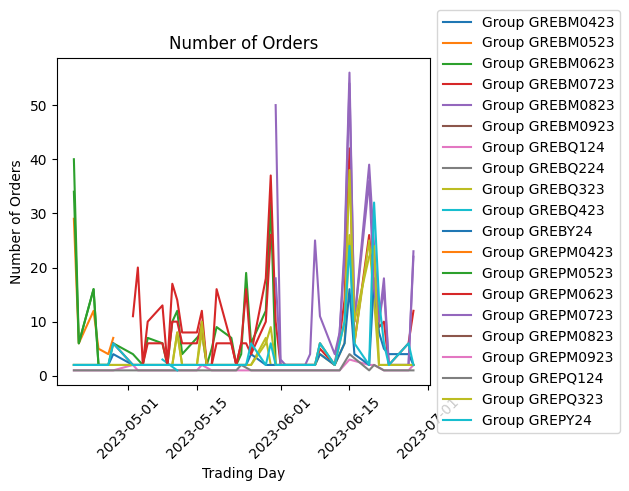

In [ ]:
# Plot the 'Number of Orders' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Number of Orders'],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

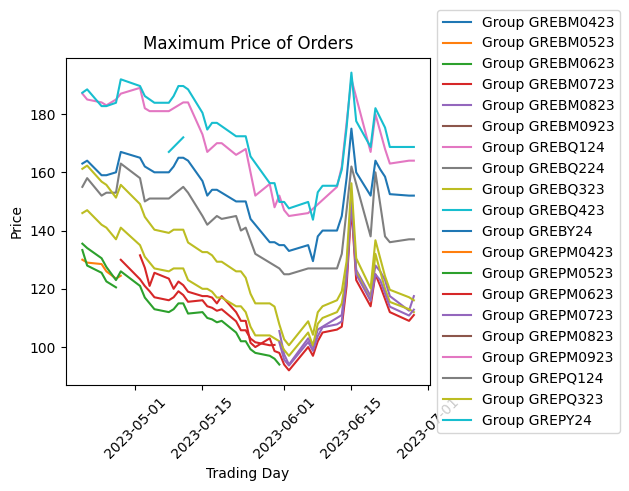

In [ ]:
# Plot the 'Max Price of Orders' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Max Price of Orders '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.title('Maximum Price of Orders')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

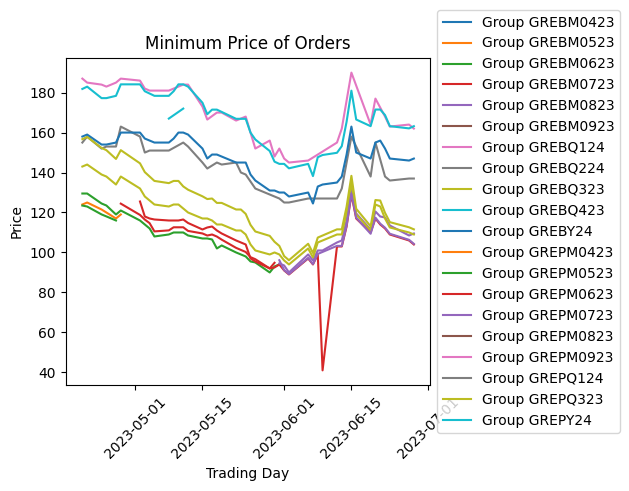

In [ ]:
# Plot the 'Min Price of Orders' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Min Price of Orders '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.title('Minimum Price of Orders')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

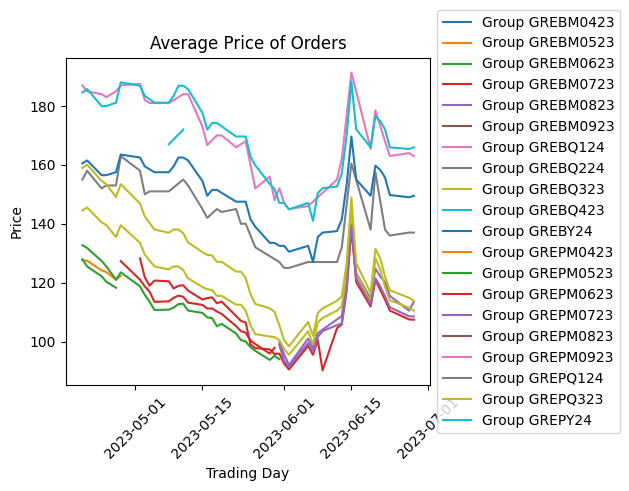

In [ ]:
# Plot the 'Average Price of Orders' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Average Price of Orders '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.title('Average Price of Orders')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

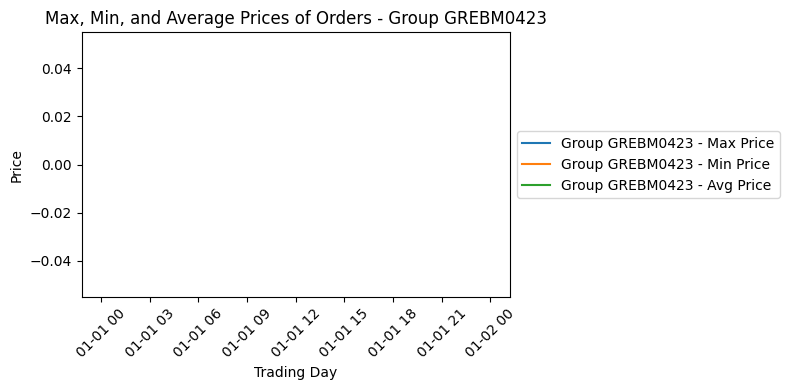

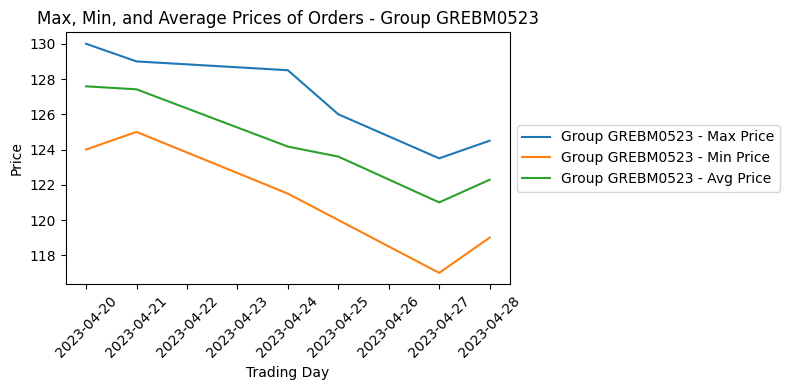

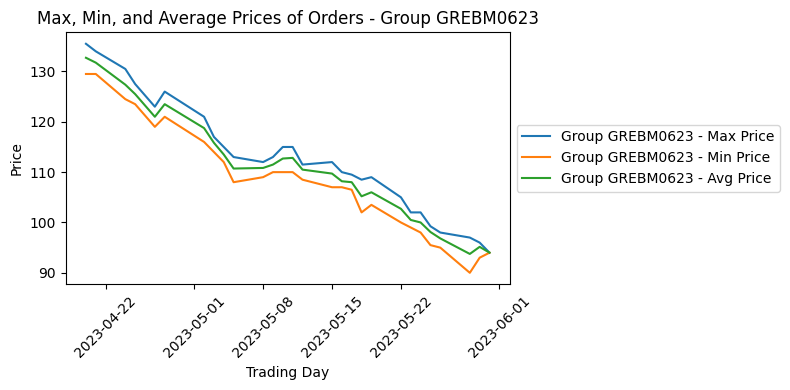

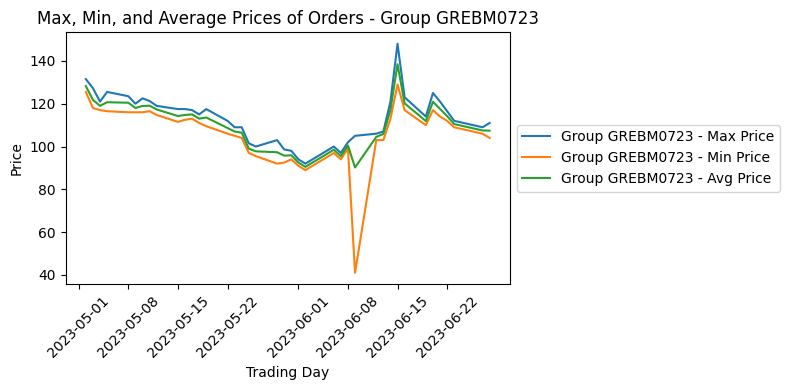

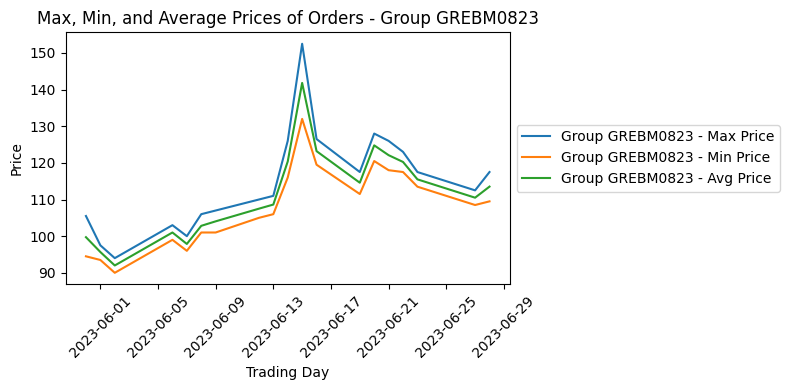

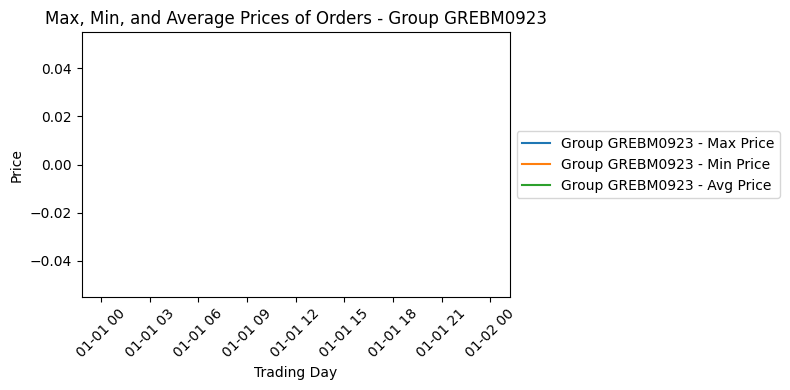

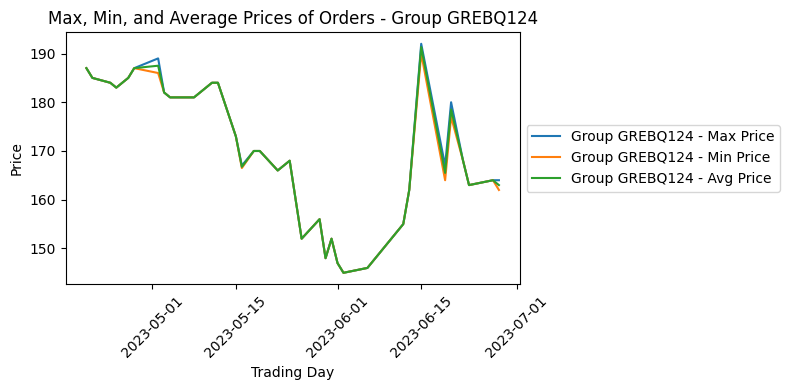

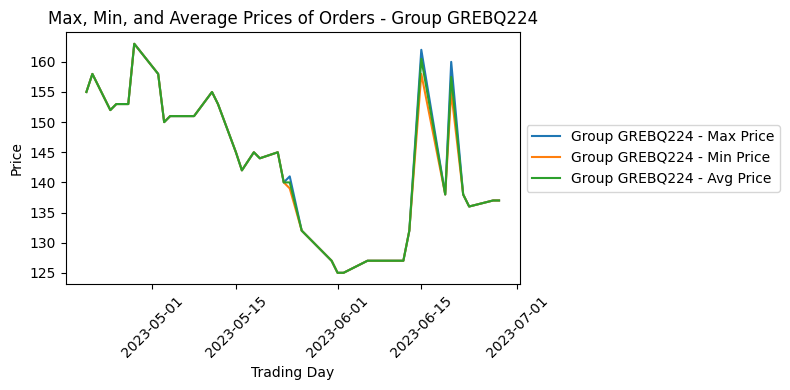

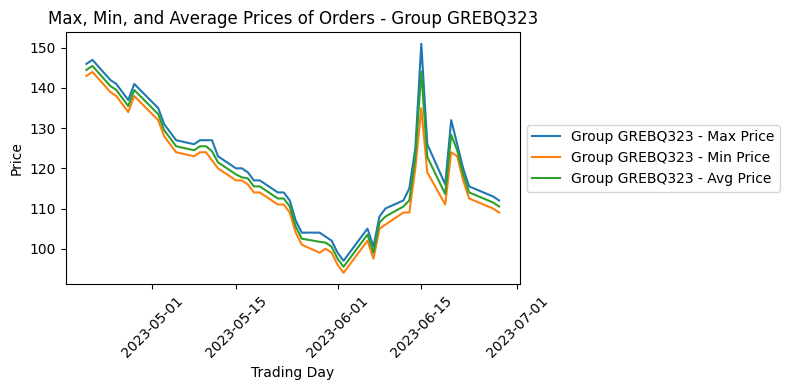

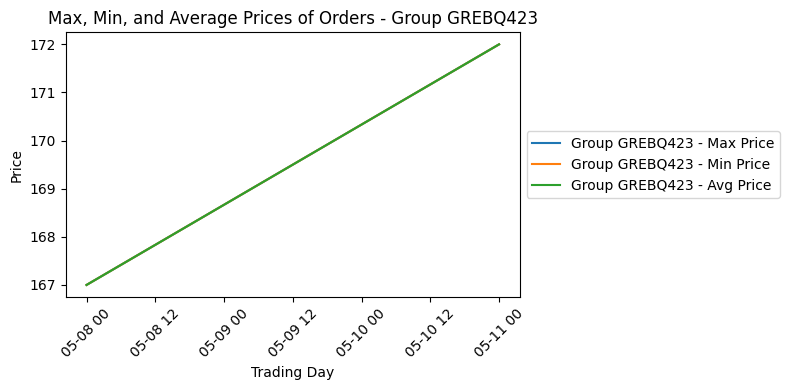

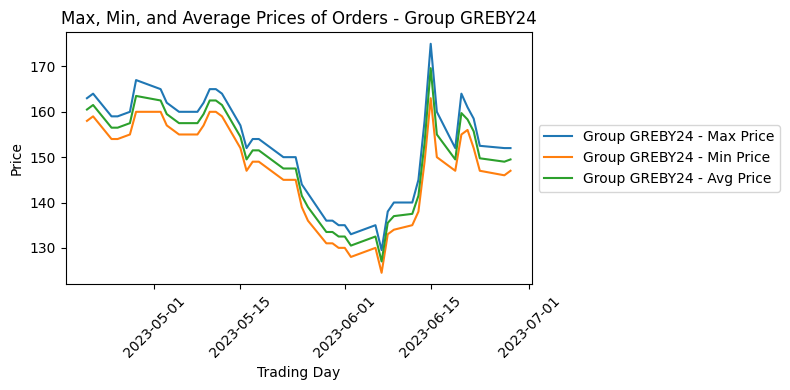

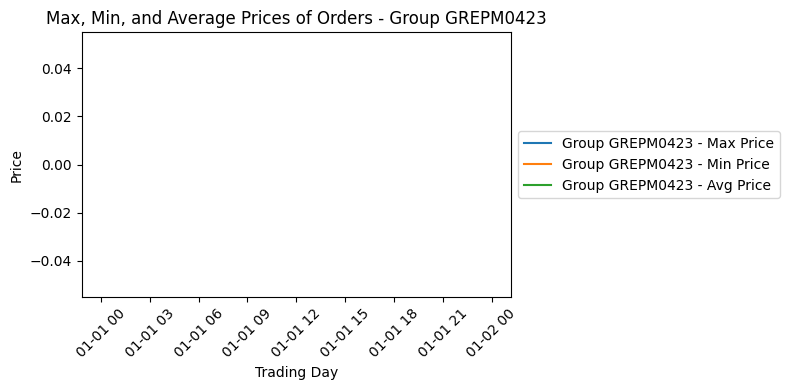

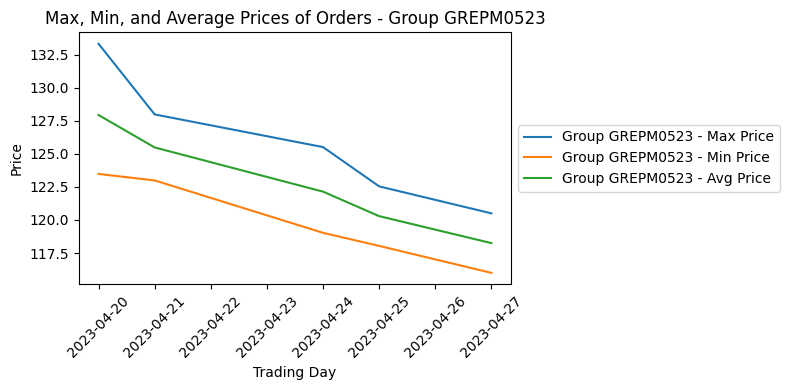

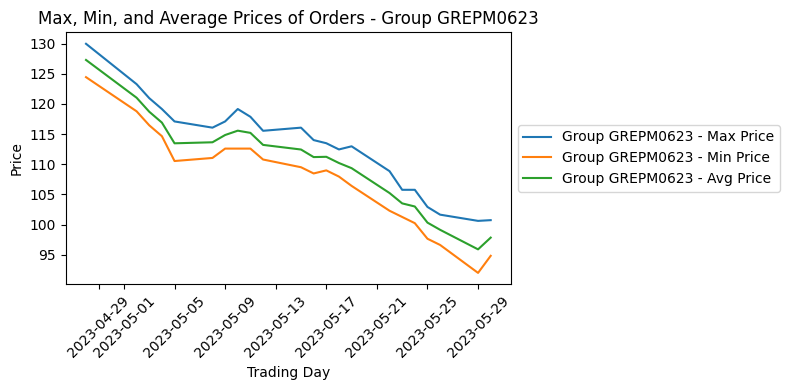

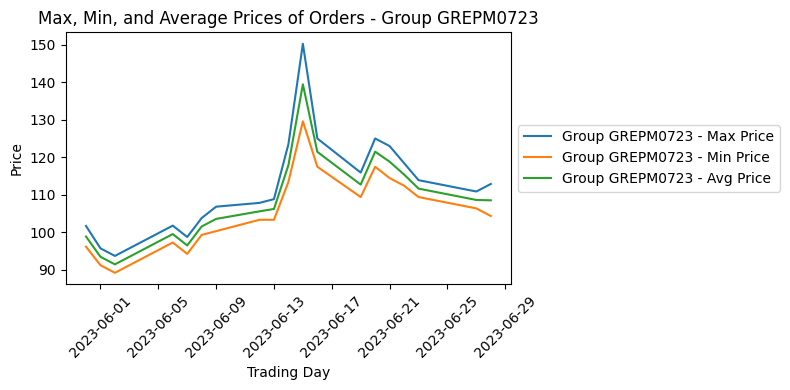

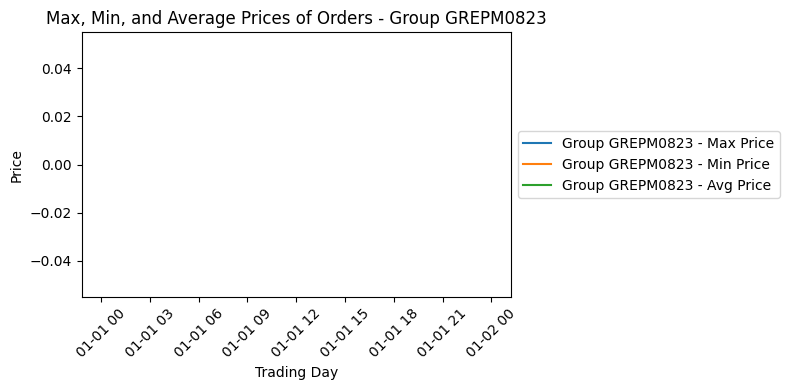

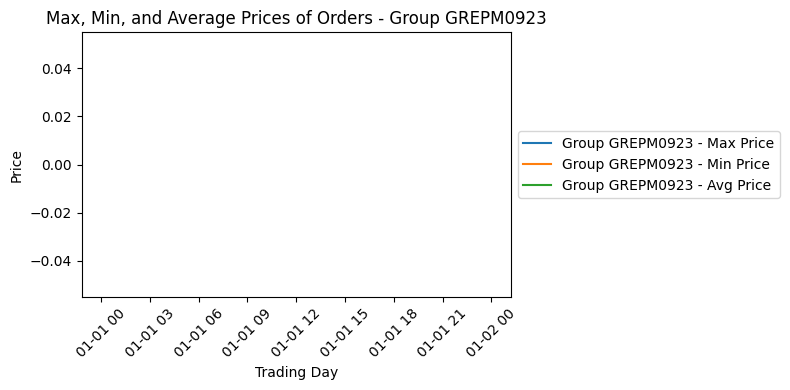

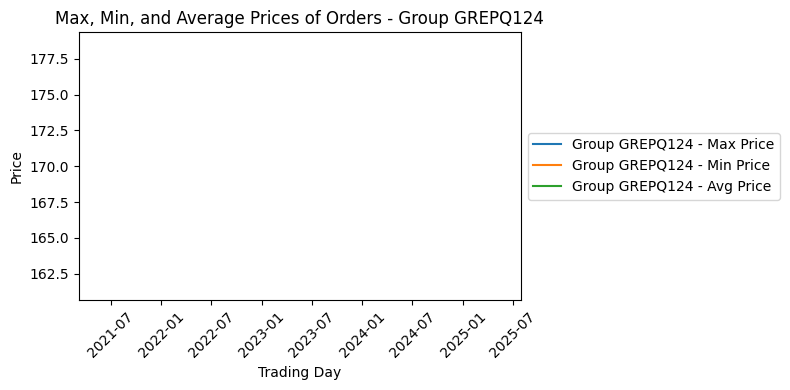

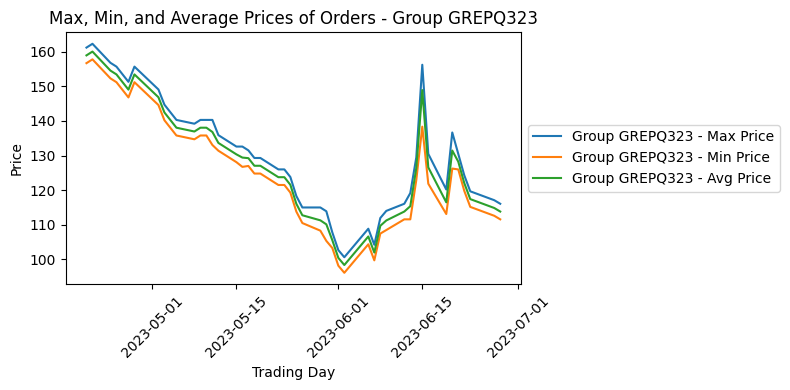

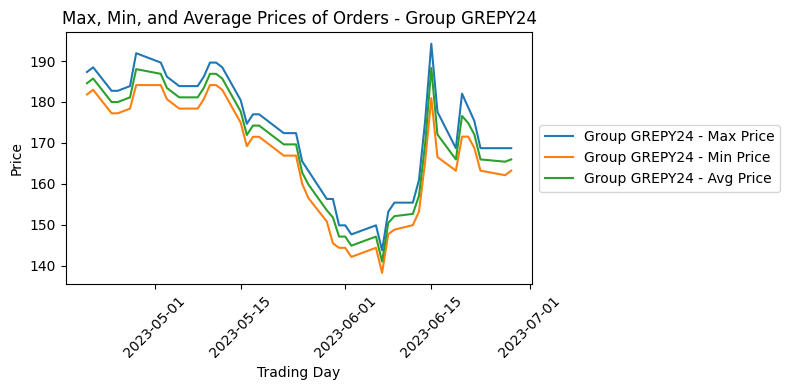

In [ ]:
# Plot 'Max Price of Orders', 'Min Price of Orders', and 'Average Price of Orders' for each group
for group_name, group_data in grouped_df:
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(group_data['Trading Day'], group_data['Max Price of Orders '],
            label=f'Group {group_name} - Max Price')
    ax.plot(group_data['Trading Day'], group_data['Min Price of Orders '],
            label=f'Group {group_name} - Min Price')
    ax.plot(group_data['Trading Day'], group_data['Average Price of Orders '],
            label=f'Group {group_name} - Avg Price')

    ax.set_xlabel('Trading Day')
    ax.set_ylabel('Price')
    ax.set_title(f'Max, Min, and Average Prices of Orders - Group {group_name}')
    ax.legend()
    plt.xticks(rotation=45)
    # Set the legend to be on the right of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

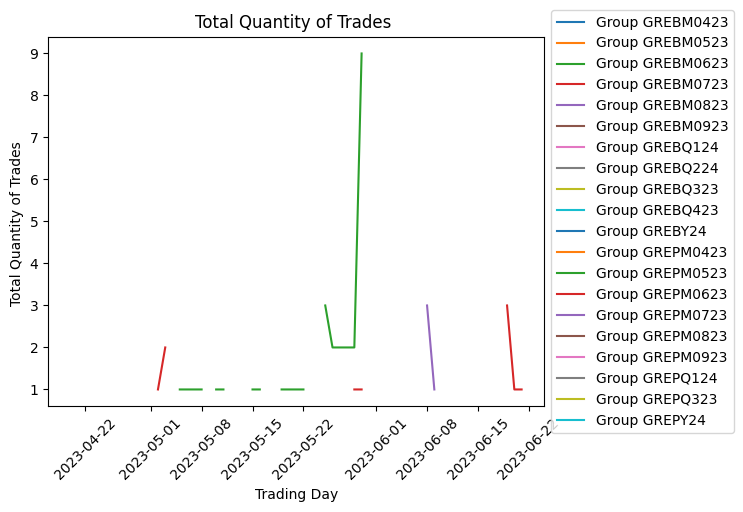

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the 'Total Quantity of Trades' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Total Quantity of Trades '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Total Quantity of Trades ')
plt.title('Total Quantity of Trades ')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

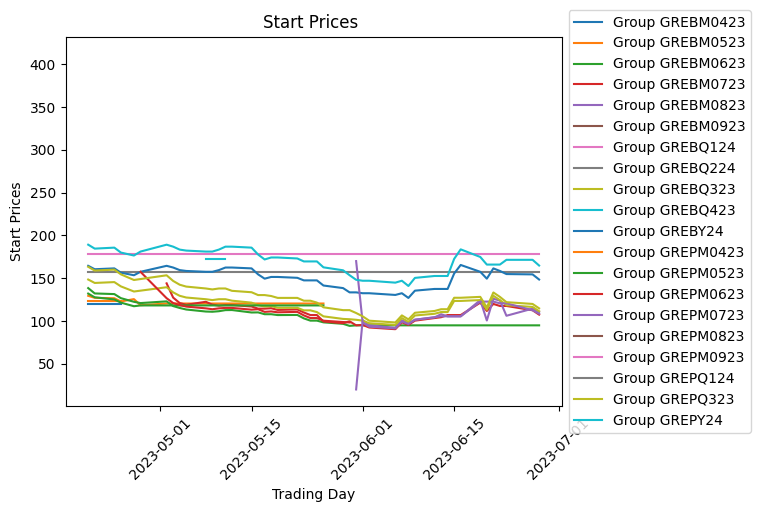

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the 'Start Prices' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Start Prices '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Start Prices')
plt.title('Start Prices ')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

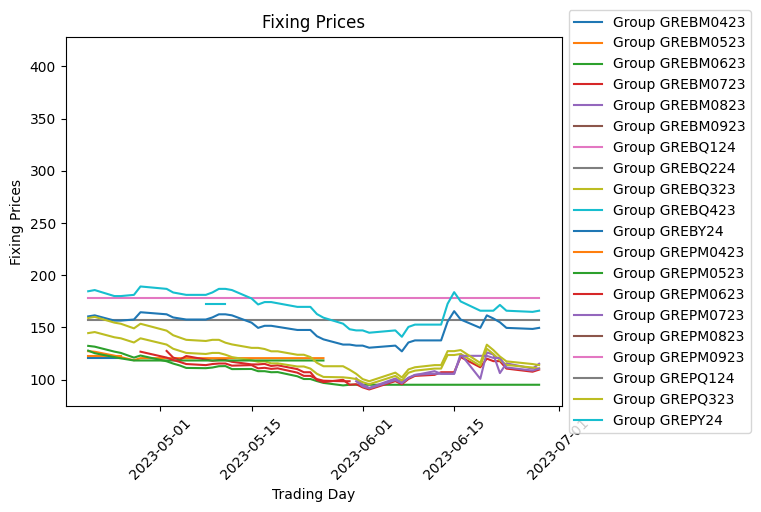

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the 'Fixing Prices' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Fixing Prices '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Fixing Prices')
plt.title('Fixing Prices')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

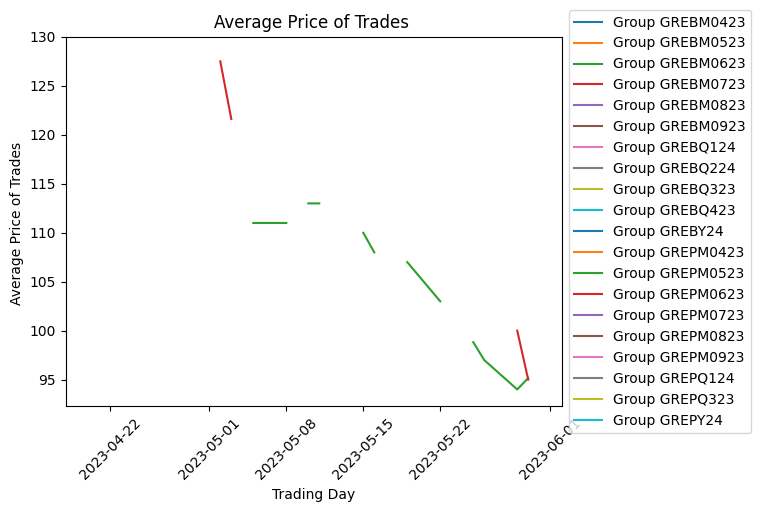

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the 'Average Price of Trades ' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Average Price of Trades'],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Average Price of Trades ')
plt.title('Average Price of Trades ')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

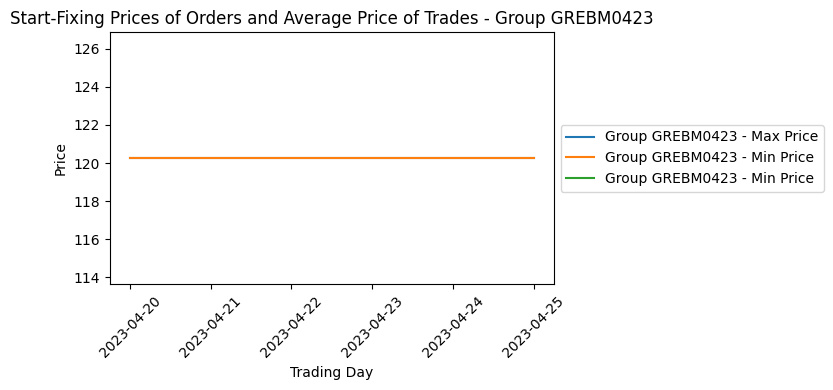

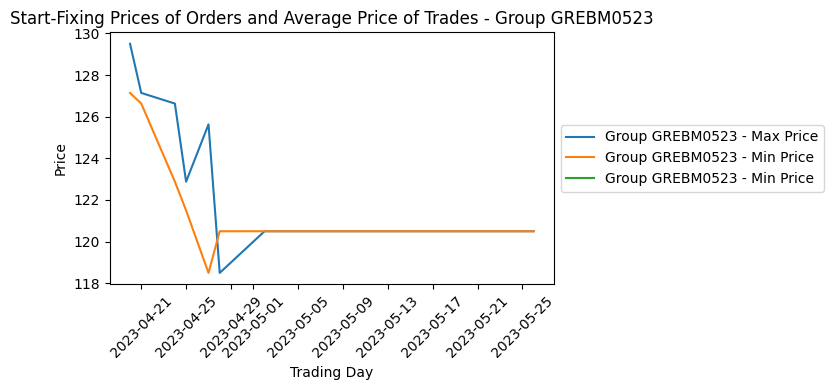

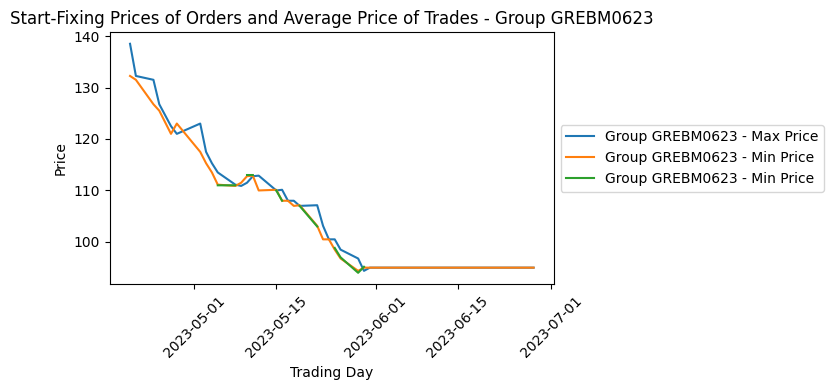

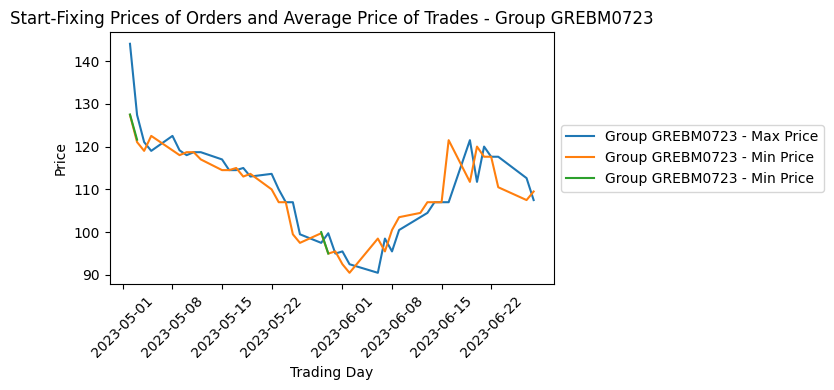

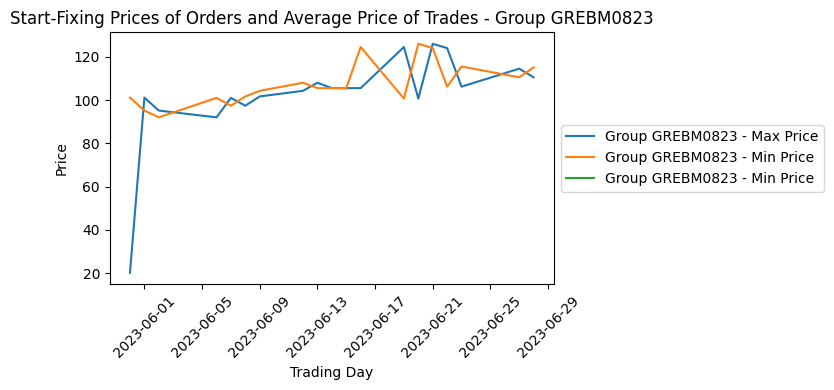

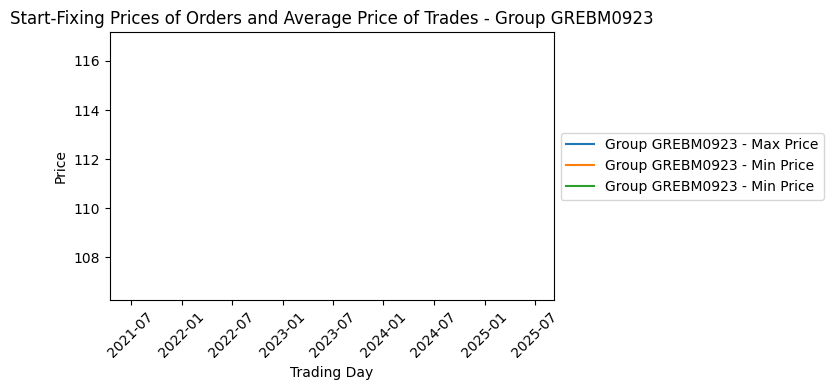

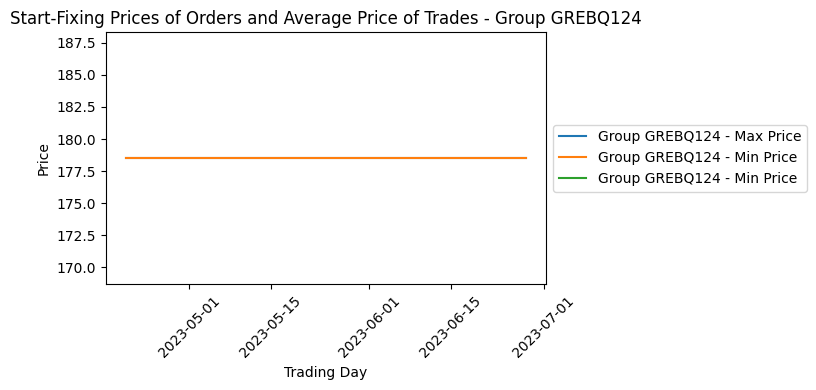

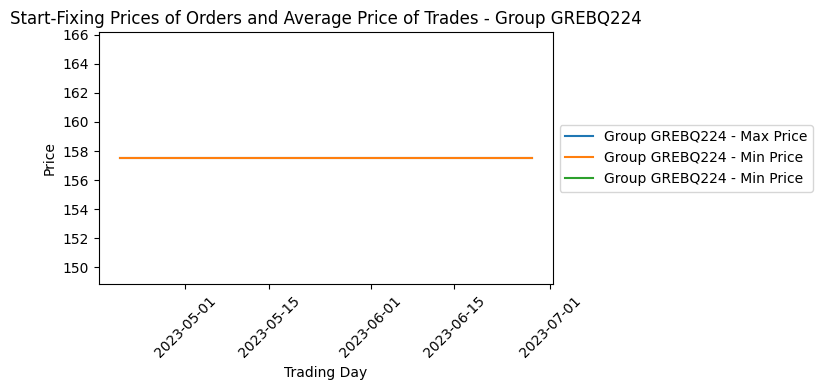

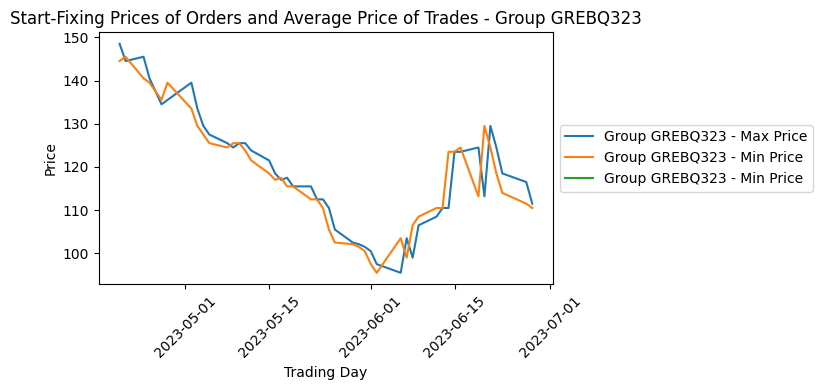

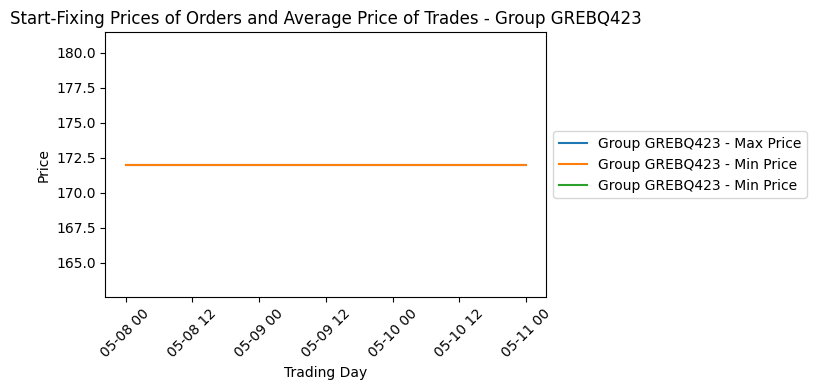

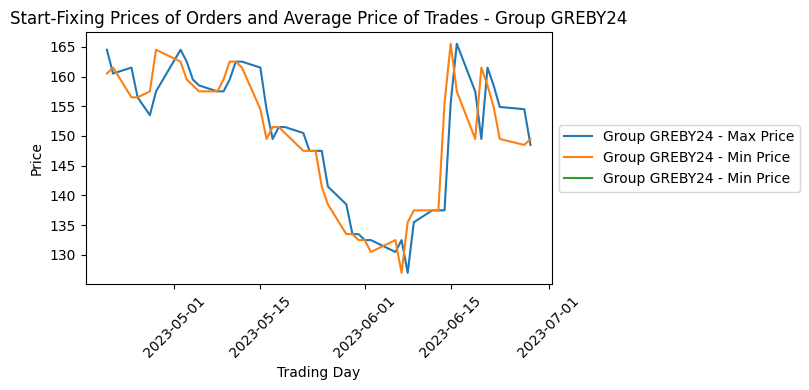

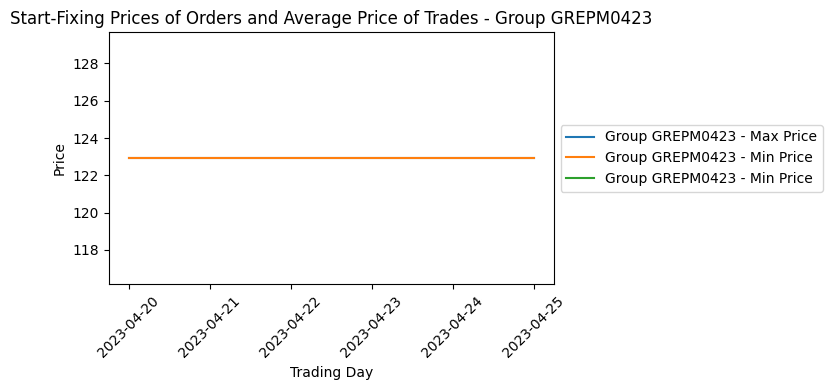

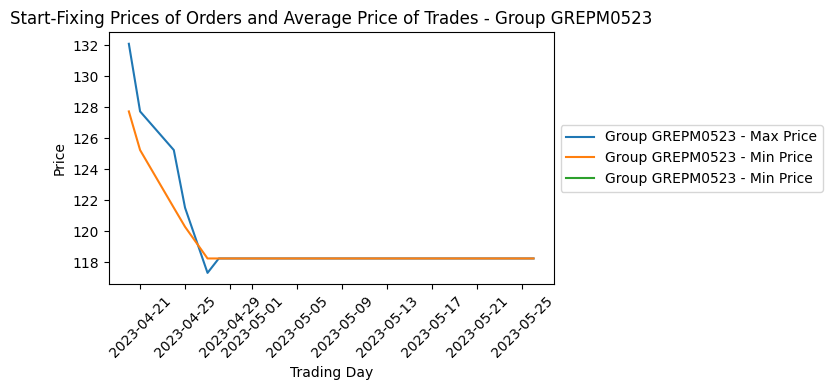

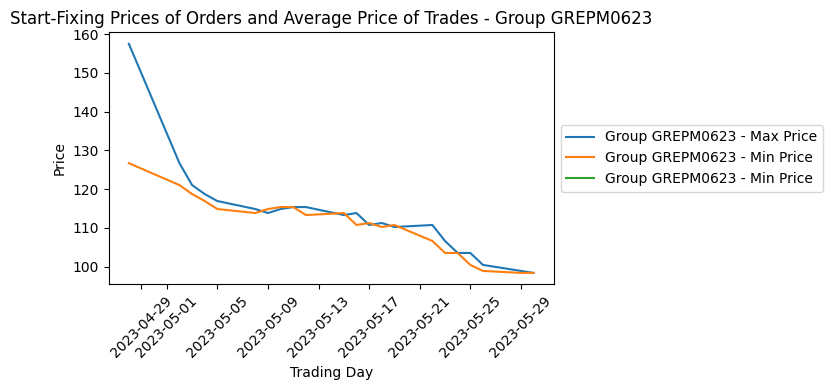

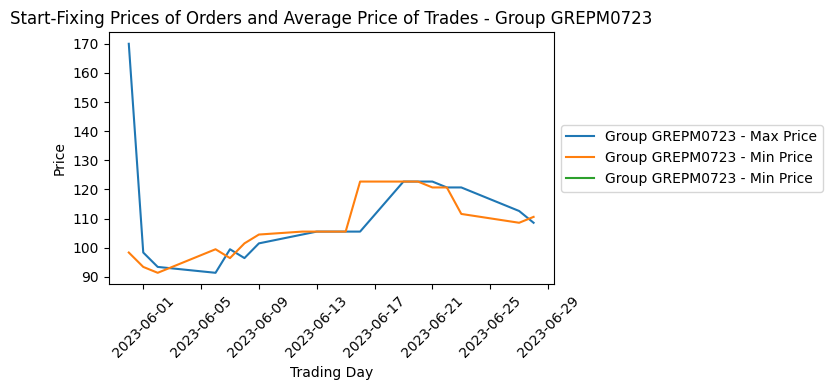

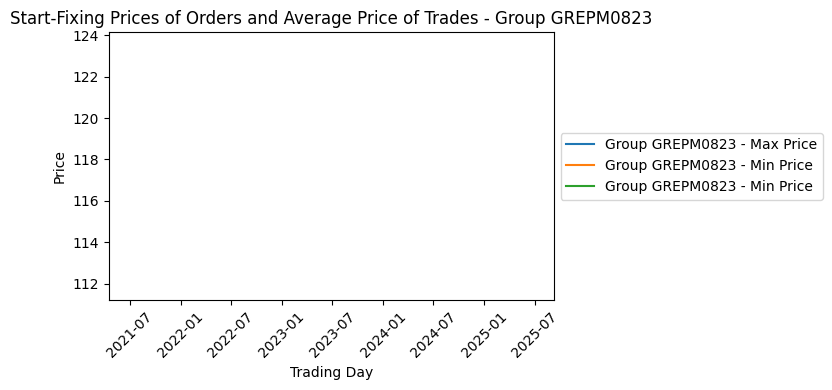

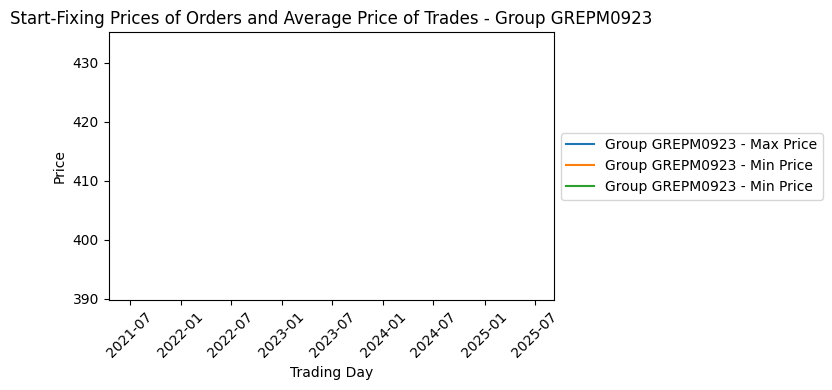

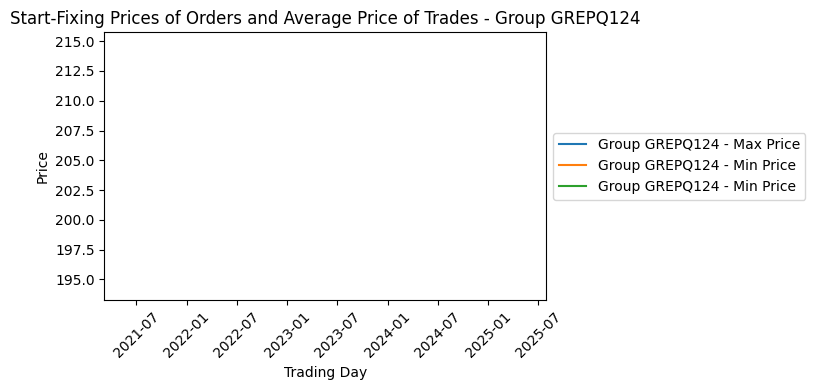

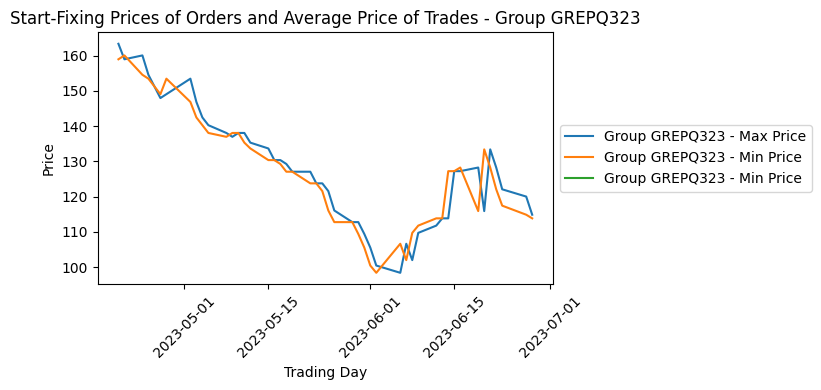

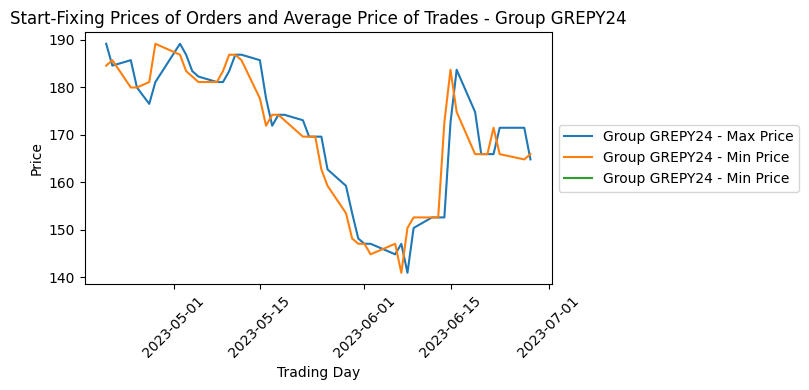

In [ ]:
# Plot 'Start Price', 'Fixing Price' and 'Average Price of Trades' for each group
for group_name, group_data in grouped_df:
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(group_data['Trading Day'], group_data['Start Prices '],
            label=f'Group {group_name} - Max Price')
    ax.plot(group_data['Trading Day'], group_data['Fixing Prices '],
            label=f'Group {group_name} - Min Price')
    ax.plot(group_data['Trading Day'], group_data['Average Price of Trades'],
            label=f'Group {group_name} - Min Price')

    ax.set_xlabel('Trading Day')
    ax.set_ylabel('Price')
    ax.set_title(f'Start-Fixing Prices of Orders and Average Price of Trades - Group {group_name}')
    ax.legend()
    plt.xticks(rotation=45)
    # Set the legend to be on the right of the graph
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

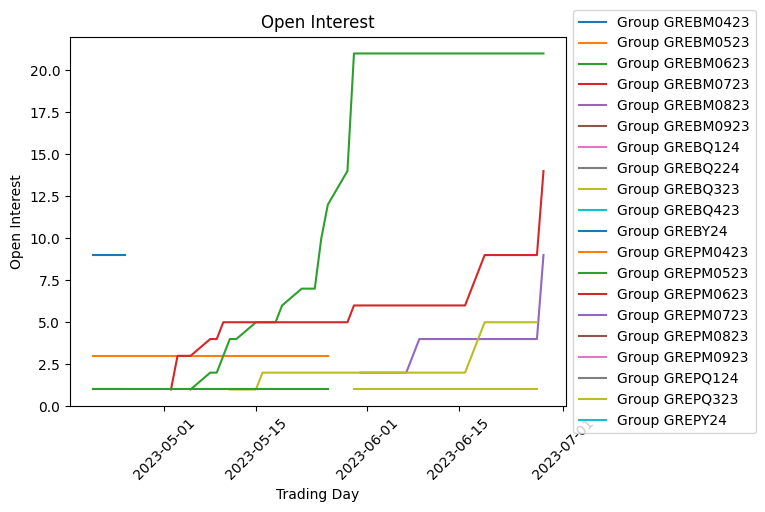

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the 'Open Interest' for each group in relation to 'Trading Day'
for group_name, group_data in grouped_df:
    plt.plot(group_data['Trading Day'], group_data['Open Interest '],
             label=f'Group {group_name}')

plt.xlabel('Trading Day')
plt.ylabel('Open Interest')
plt.title('Open Interest')
plt.xticks(rotation=45)

# Set the legend to be on the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

#Implement PCA

#Encoding Instrument and Trading Day

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['Instrument ', 'Number of Orders', 'Max Price of Orders ',
       'Min Price of Orders ', 'Average Price of Orders ', 'Number of Quotes ',
       'Number of Trades', 'Average Price of Trades (VWAP)',
       'Total Quantity of Trades ', 'Start Prices ', 'Fixing Prices ',
       'Open Interest ', 'Average Price of Trades', 'Trading Day'],
      dtype='object')

In [ ]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
df['Instrument '] = encoder.fit_transform(df['Instrument '])

In [ ]:
df['Trading Day'] = encoder.fit_transform(df['Trading Day'])

#Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

#Detect Outlier in the initial dataset

##Z-Score Method

In [ ]:
df.columns

Index(['Instrument ', 'Number of Orders', 'Max Price of Orders ',
       'Min Price of Orders ', 'Average Price of Orders ', 'Number of Quotes ',
       'Number of Trades', 'Average Price of Trades (VWAP)',
       'Total Quantity of Trades ', 'Start Prices ', 'Fixing Prices ',
       'Open Interest ', 'Average Price of Trades', 'Trading Day'],
      dtype='object')

In [ ]:
z_scores = (df['Number of Orders'] - df['Number of Orders'].mean()) / df['Number of Orders'].std()

# Define the threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

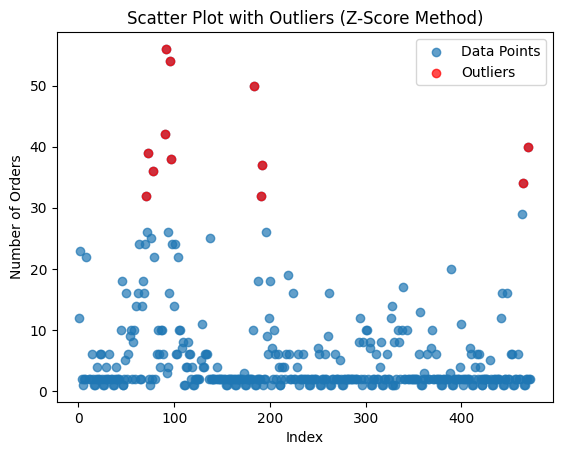

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['Number of Orders'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['Number of Orders'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Number of Orders')
plt.title('Scatter Plot with Outliers (Z-Score Method)')
plt.legend()
plt.show()

##IQR (Interquartile Range) Method

In [ ]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['Number of Orders'].quantile(0.25)
Q3 = df['Number of Orders'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = df[(df['Number of Orders'] < lower_bound) | (df['Number of Orders'] > upper_bound)]

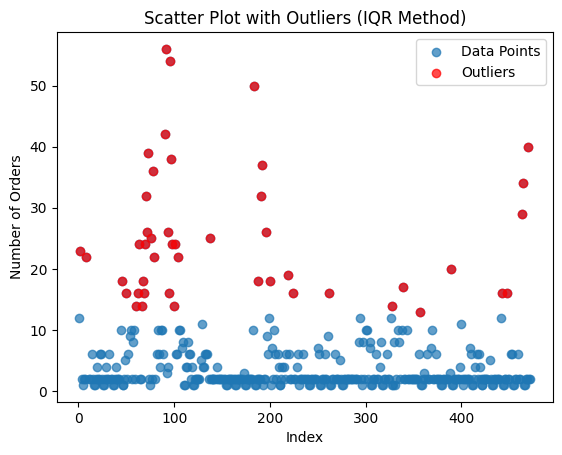

In [ ]:
# Plot the scatter plot of 'Number of Orders' with outliers highlighted in red
plt.scatter(df.index, df['Number of Orders'], label='Data Points', alpha=0.7)
plt.scatter(outliers.index, outliers['Number of Orders'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Number of Orders')
plt.title('Scatter Plot with Outliers (IQR Method)')
plt.legend()
plt.show()

##Visualization and Manual Inspection

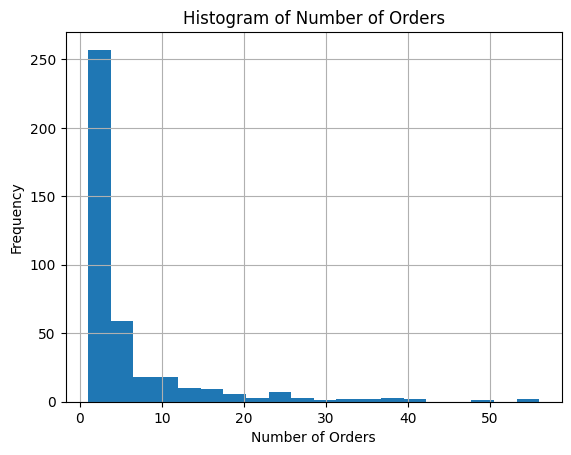

In [ ]:
# Plot a histogram to visualize the distribution of 'Column_A'
df['Number of Orders'].hist(bins=20)
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Orders')
plt.show()

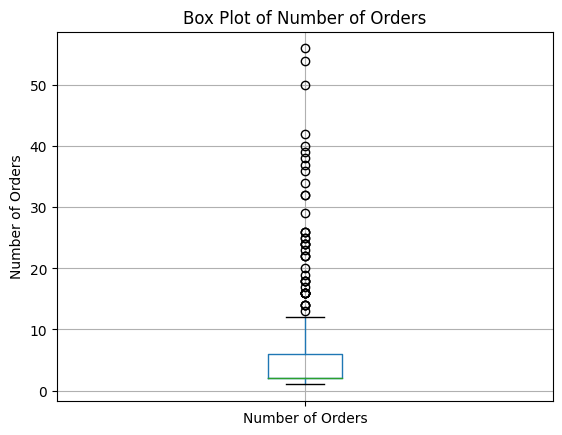

In [ ]:
# Plot a box plot to identify potential outliers
df.boxplot(column='Number of Orders')
plt.ylabel('Number of Orders')
plt.title('Box Plot of Number of Orders')
plt.show()

###For relation to other columns

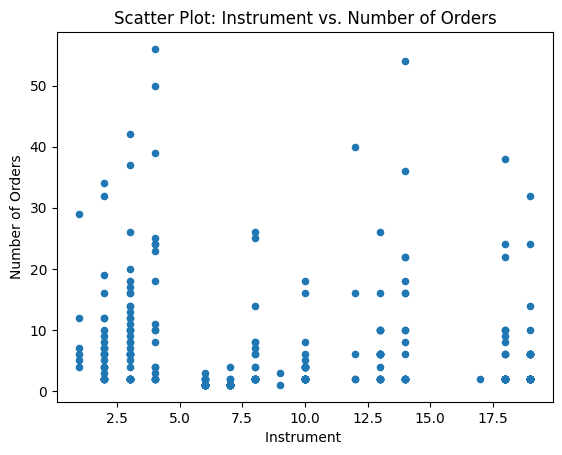

In [ ]:
df.plot.scatter(x='Instrument ', y='Number of Orders')
plt.title('Scatter Plot: Instrument vs. Number of Orders')
plt.show()

#Conclude for fuzzy/noisy data